# Big Data 
# Mini-projet : SVM
# Dani Halegua - Luca Champesting - Idyano Leroy 

# Exercice 1 mini-projet : Classification de chiffres

(1) On charge la base de données MNIST : 

Les attributs des données MNIST :  ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


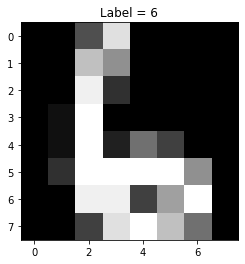

In [1]:
#Importations des bibliothèques necessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

digits = load_digits() # charge la base de données MNIST

print("Les attributs des données MNIST : ", dir(digits))

X = digits.images
X = X / 255.0
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1]*digits.images.shape[2]) #redimensionne les observations
y = digits.target.reshape(digits.target.shape[0]) #etiquettes (labels) des observations

#print(X.shape)
#print(y.shape)

def displayImage(i): #fonction affichage observation et son label
    plt.title(f"Label = {digits.target[i]}")
    plt.imshow(digits.images[i], cmap='gray')
    plt.show()

displayImage(67) #affichage d'une image d'un chiffre de la base de données MNIST

In [2]:
#Split data into train partition and test partition (taille 75 % des X) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.75)
#Creer les echantillons pour chaque classe k pour les train et test
y_train_0 = (y_train==0).astype(int) ; y_test_0 = (y_test==0).astype(int)
y_train_1 = (y_train==1).astype(int) ; y_test_1 = (y_test==1).astype(int)
y_train_2 = (y_train==2).astype(int) ; y_test_2 = (y_test==2).astype(int)
y_train_3 = (y_train==3).astype(int) ; y_test_3 = (y_test==3).astype(int)
y_train_4 = (y_train==4).astype(int) ; y_test_4 = (y_test==4).astype(int)
y_train_5 = (y_train==5).astype(int) ; y_test_5 = (y_test==5).astype(int)
y_train_6 = (y_train==6).astype(int) ; y_test_6 = (y_test==6).astype(int)
y_train_7 = (y_train==7).astype(int) ; y_test_7 = (y_test==7).astype(int)
y_train_8 = (y_train==8).astype(int) ; y_test_8 = (y_test==8).astype(int)
y_train_9 = (y_train==9).astype(int) ; y_test_9 = (y_test==9).astype(int)

print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
print(y_test.shape)

print(X_test.shape, X_test[0,:].shape, X_test[:,0].shape)

(449, 64)
(1348,)
(1348, 64) (64,) (1348,)


 Construction des différents classifieurs binaires : 

In [3]:
C = 1/10

clf_bin_0 = SVC(C=C, kernel='linear', random_state=0)
clf_bin_0.fit(X_train,y_train_0)
w0 = clf_bin_0.coef_
b0 = clf_bin_0.intercept_
#y_pred_0 = clf_bin_0.predict(X_test)

clf_bin_1 = SVC(C=C, kernel='linear', random_state=0)
clf_bin_1.fit(X_train,y_train_1)
w1 = clf_bin_1.coef_
b1 = clf_bin_1.intercept_
#y_pred_1 = clf_bin_1.predict(X_test)

clf_bin_2 = SVC(C=C, kernel='linear', random_state=0)
clf_bin_2.fit(X_train,y_train_2)
w2 = clf_bin_2.coef_
b2 = clf_bin_2.intercept_
#y_pred_2 = clf_bin_2.predict(X_test)

clf_bin_3 = SVC(C=C, kernel='linear', random_state=0)
clf_bin_3.fit(X_train,y_train_3)
w3 = clf_bin_3.coef_
b3 = clf_bin_3.intercept_
#y_pred_3 = clf_bin_1.predict(X_test)

clf_bin_4 = SVC(C=C, kernel='linear', random_state=0)
clf_bin_4.fit(X_train,y_train_4)
w4 = clf_bin_4.coef_
b4 = clf_bin_4.intercept_
#y_pred_4 = clf_bin_4.predict(X_test)

clf_bin_5 = SVC(C=C, kernel='linear', random_state=0)
clf_bin_5.fit(X_train,y_train_5)
w5 = clf_bin_5.coef_
b5 = clf_bin_5.intercept_
#y_pred_5 = clf_bin_5.predict(X_test)

clf_bin_6 = SVC(C=C, kernel='linear', random_state=0)
clf_bin_6.fit(X_train,y_train_6)
w6 = clf_bin_6.coef_
b6 = clf_bin_6.intercept_
#y_pred_6 = clf_bin_6.predict(X_test)

clf_bin_7 = SVC(C=C, kernel='linear', random_state=0)
clf_bin_7.fit(X_train,y_train_7)
w7 = clf_bin_7.coef_
b7 = clf_bin_7.intercept_
#y_pred_7 = clf_bin_7.predict(X_test)

clf_bin_8 = SVC(C=C, kernel='linear', random_state=0)
clf_bin_8.fit(X_train,y_train_8)
w8 = clf_bin_8.coef_
b8 = clf_bin_8.intercept_
#y_pred_8 = clf_bin_8.predict(X_test)

clf_bin_9 = SVC(C=C, kernel='linear', random_state=0)
clf_bin_9.fit(X_train,y_train_9)
w9 = clf_bin_9.coef_
b9 = clf_bin_9.intercept_
#y_pred_9 = clf_bin_9.predict(X_test)

 Construction du classifieur multi-label avec la règle de $Argmax_{k = 0,...,9}  \langle w_{k}, x \rangle + b_{k}$ : 

In [5]:
C = 1/10

def one_vs_all_classifieur_multi_label(C, kernel, X_train, y_train, X_test, y_test):
    w = []
    b = []
    for k in range(10): #pour les 10 classifieurs binaires 
        clf_bin = SVC(C=C, kernel=kernel, random_state=0)
        clf_bin.fit(X_train,(y_train==k).astype(int)) #entraine les classifieurs binaires pour la classe k
        w.append(clf_bin.coef_) #met dans une liste les w_k
        b.append(clf_bin.intercept_) #met dans une liste les b_k
    y_pred_multi = np.zeros(X_test[:,0].shape)
    # regle de decision
    for j in range(y_pred_multi.shape[0]):
        #print(f"Pour image = {j+1}")
        max_f_k = None
        k = None
        for i in range(len(w)):
            #print(f"Classe {i} : f_k {float(np.dot(w[i], X_test[j,:]) + b[i])}")
            if max_f_k == None or max_f_k < float(np.dot(w[i], X_test[j,:]) + b[i]) :
                max_f_k = float(np.dot(w[i], X_test[j,:]) + b[i]) #argmax w_k*X + b_k
                k = i
        #print(f"Classe retenue = {k}")
        y_pred_multi[j] = k #met la prediction de la classe dans le classifieur multi_label
    score = accuracy_score(y_pred_multi,y_test)
    return y_pred_multi, score

y_pred_multi, score  = one_vs_all_classifieur_multi_label(C,'linear',X_train, y_train,X_test,y_test)
print(y_pred_multi)
print("score =", score)

[2. 8. 2. ... 0. 2. 0.]
score = 0.9436201780415431


(2) Evaluation des performances du classifieur multi-label sur une base de test. On regarde quel noyau et valeur de paramètre C donnent les meilleurs performances :

In [6]:
from tqdm import tqdm

C = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 12, 15, 30, 50, 100]
kernel_dico = {'linear'}  #on peut connaitre les poids w que lorsque le noyau est linéaire
best_score = 0

for c in tqdm (C):
    for k in (kernel_dico):
        y_pred, score = one_vs_all_classifieur_multi_label(c, k, X_train, y_train, X_test, y_test)

        if score > best_score: # on garde les meilleurs paramètres en mémoire
            best_score = score
            best_C = c; best_kernel = k;

print(f"Meilleur score = {best_score} pour C = {best_C} et noyau = {best_kernel}")

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 14.77it/s]

Meilleur score = 0.9525222551928784 pour C = 0.01 et noyau = linear


Notre classifieur crée manuellement ne nous permet de tester uniquement le noyau ``linear`` car les autres noyaux ne possèdent pas d'attribut ``coef_`` qui correspond au $w_k$ utilisé par notre classifieur.

Pour tester les performances des autres noyaux, on refait le même travail en utilisant l’implémentation des SVM multi-classe utilisant directement une stratégie de "tous contre un" de la fonction $\textit{svc}$ :

In [7]:
from sklearn.multiclass import OneVsRestClassifier

C = [0.01, 0.1, 0.5, 1, 5, 10, 12, 15, 30, 50, 100]
kernel_dico = {'linear', 'poly', 'rbf', 'sigmoid'}
best_score = 0

for c in tqdm(C):
    for k in kernel_dico:
        clf_multi = OneVsRestClassifier(SVC(C=c, kernel=k, random_state=0)).fit(X_train, y_train) #strategie de tous contre un
        y_pred = clf_multi.predict(X_test)
        score = accuracy_score(y_pred,y_test)
        if score > best_score: # on garde les meilleurs paramètres en mémoire
            best_score = score
            best_C = c; best_kernel = k;

print(f"Meilleur score = {best_score} pour C = {best_C} et noyau = {best_kernel}")

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  2.82it/s]

Meilleur score = 0.9799703264094956 pour C = 5 et noyau = rbf


(3) On refait le même travail en utilisant l’implémentation des SVM multi-classe utilisant une stratégie de "un contre un" de la fonction $\textit{svc}$ :

In [8]:
from sklearn.multiclass import OneVsOneClassifier

C = [0.01, 0.1, 0.5, 1, 5, 10, 12, 15, 30, 50, 100]
kernel_dico = {'linear', 'poly', 'rbf', 'sigmoid'}
best_score = 0

for c in tqdm(C):
    for k in kernel_dico:
        clf_multi = OneVsOneClassifier(SVC(C=c, kernel=k, random_state=0)).fit(X_train, y_train) #strategie de un contre un
        y_pred = clf_multi.predict(X_test)
        score = accuracy_score(y_pred,y_test)
        if score > best_score: # on garde les meilleurs paramètres en mémoire
            best_score = score
            best_C = c; best_kernel = k;

print(f"Meilleur score = {best_score} pour C = {best_C} et noyau = {best_kernel}")

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:15<00:00,  1.39s/it]

Meilleur score = 0.9821958456973294 pour C = 10 et noyau = rbf


On observe que le meilleur résultat est obtenu grâce à la méthode "un contre un", même si pour les deux méthodes la précision est très élevée. De plus le noyau gaussien ``rbf`` couplé à un ``C`` = 10 semble donner les meilleurs résultats.